In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
from matplotlib.image import NonUniformImage
import itertools

In [2]:
#import the root file
tracks = uproot.open('/share/lazy/tboettch/BsPhiPhi_VeloUT_MCMatch_TrueTraj.root')['tracks']

#extract the different arrays from the file
arr = tracks.arrays([b'pt',b'p',b'eta',b'tx',b'ty',b'ox',b'oy',b'oz',b'rec_scifi',b'ut_p',b'scifi_p',b'q',b'long',b'velo_x',b'velo_y',b'velo_z',
                     b'ut_x0',b'ut_z0',b'ut_dxdy',b'ut_ymin',b'ut_ymax',b'scifi_x0',b'scifi_z0',b'scifi_dxdy',b'scifi_ymin',b'scifi_ymax',b'true_traj_x',
                     b'true_traj_y',b'true_traj_z'])

#create individual Python arrays for each set of information 
p = arr[b'p']
charge = arr[b'q']
rec_scifi = arr [b'rec_scifi']
pt = arr[b'pt']
tx_i = arr[b'tx']
ty_i = arr[b'ty']
x_traj = arr[b'true_traj_x']
y_traj = arr[b'true_traj_y']
z_traj = arr[b'true_traj_z']
velo_x = arr[b'velo_x']
velo_y = arr[b'velo_y']
velo_z = arr[b'velo_z']
ut_x0 = arr[b'ut_x0']
ut_z0 = arr[b'ut_z0']
scifi_x0 = arr[b'scifi_x0']
scifi_z0 = arr[b'scifi_z0']
ut_ymin = arr[b'ut_ymin']
ut_ymax = arr[b'ut_ymax']
scifi_ymax = arr[b'scifi_ymax']
scifi_ymin = arr[b'scifi_ymin']
ut_dxdy = arr[b'ut_dxdy']
scifi_dxdy = arr[b'scifi_dxdy']
long = arr[b'long']
scifi_p =  arr[b'scifi_p']

In [3]:
#select tracks based on specific conditions. Add or remove filters by changing parameters inside the if commands below

p_l = 3000.
p_u = 5000.


p1 = [p[x] for x in range(len(p)) if (p_l < p[x] < p_u) ]
rec_scifi1 = [rec_scifi[x] for x in range(len(p)) if ( p_l < p[x] < p_u) ]
pt1 = [pt[x] for x in range(len(p)) if (p_l < p[x] < p_u) ]
tx_i1 = [tx_i[x] for x in range(len(p)) if (p_l < p[x] < p_u) ]
ty_i1 = [ty_i[x] for x in range(len(p)) if (p_l < p[x] < p_u) ]
x_traj1 = [x_traj[x] for x in range(len(p)) if (p_l < p[x] < p_u) ]
y_traj1 = [y_traj[x] for x in range(len(p)) if (p_l < p[x] < p_u) ]
z_traj1 = [z_traj[x] for x in range(len(p)) if (p_l < p[x] < p_u) ]
velo_x1 = [velo_x[x] for x in range(len(p)) if (p_l < p[x] < p_u) ]
velo_y1 = [velo_y[x] for x in range(len(p)) if (p_l < p[x] < p_u) ]
velo_z1 = [velo_z for x in range(len(p)) if (p_l< p[x] < p_u) ]
ut_x01 = [ut_x0[x] for x in range(len(p)) if (p_l < p[x] < p_u) ]
ut_z01 = [ut_z0[x] for x in range(len(p)) if ( p_l < p[x] < p_u) ]
scifi_x01 = [scifi_x0[x] for x in range(len(p)) if ( p_l < p[x] < p_u) ]
scifi_z01 = [scifi_z0[x] for x in range(len(p)) if ( p_l < p[x] < p_u) ]
ut_ymin1 = [ut_ymin[x] for x in range(len(p)) if ( p_l < p[x] < p_u) ]
ut_ymax1 = [ut_ymax[x] for x in range(len(p)) if ( p_l < p[x] < p_u) ]
scifi_ymax1 = [scifi_ymax[x] for x in range(len(p)) if (p_l < p[x] < p_u) ]
scifi_ymin1 = [scifi_ymin[x] for x in range(len(p)) if ( p_l < p[x] < p_u) ]
ut_dxdy1 = [ut_dxdy[x] for x in range(len(p)) if ( p_l < p[x] < p_u) ]
scifi_dxdy1 = [scifi_dxdy[x] for x in range(len(p)) if (p_l < p[x] < p_u) ]
long1 = [long[x] for x in range(len(p)) if ( p_l < p[x] < p_u) ]
scifi_p1 = [scifi_p[x] for x in range(len(p)) if ( p_l < p[x] < p_u) ]


In [24]:
#open the magnetic field map file and read it
file = open("smooth_v5r0.map",'r')
rows=file.readlines()
data=[]
for x in rows:
    data.append(x.split())
file.close()

#creating empty arrays to store respective components of magnetic field
B_x = np.zeros((81,71,121))
B_y = np.zeros((81,71,121))
B_z = np.zeros((81,71,121))

#create unique indexes for every 3-dimensional coordinate. Much faster to retrieve magnetic field from indices
# than reading the file every single time
# the origin of the code assigning indices is in the file called field instructions
for x in data:
    
    if abs(int(x[0]))>4000 or abs(int(x[1]))>3500:
        continue
        
    ix = (int(x[0])+4001)//100
    iy = (int(x[1])+3501)//100
    iz = (int(x[2])+ 501)//100
    
    if ix<0 or ix>80 or iy<0 or iy>70:
        continue
    
    if iz>120:
        break
    
        
    B_x[ix][iy][iz] = x[3]
    B_y[ix][iy][iz] = x[4]
    B_z[ix][iy][iz] = x[5]

In [31]:
#everything here is in millimeters and MeV/c. Below's is the correct value of c for our units
# these are the initial conditions for the extrapolator. Make changes here. r is the index within the root file. 
r = 1
p_m = float(p1[r])
tx = float(tx_i1[r])
ty = float(ty_i1[r])
q = int(charge1[r])
x1 = x_traj1[r][0]
y1 = y_traj1[r][0]
z1 = z_traj1[r][0]
s = np.array([x1,y1,z1])
c = 299.792

In [32]:
# retrieve x-coordinates of the UT and SciFi strips from the y-coordinates and slope.
def x_coordinate(y, dxdy, x0):
    x = y*dxdy + x0
    return x
# using the x-coordinate function to get UT and SciFi strips coordinates to plot
ut_xmin = []
ut_xmax = []
scifi_xmax = []
scifi_xmin = []
for y, dxdy, x0 in zip(ut_ymin1[r], ut_dxdy1[r], ut_x01[r]):
    x = x_coordinate(y, dxdy, x0)
    ut_xmin.append(x)
    
for y, dxdy, x0 in zip(ut_ymax1[r], ut_dxdy1[r], ut_x01[r]):
    x = x_coordinate(y, dxdy, x0)
    ut_xmax.append(x)
    
for y, dxdy, x0 in zip(scifi_ymin1[r], scifi_dxdy1[r], scifi_x01[r]):
    x = x_coordinate(y, dxdy, x0)
    scifi_xmin.append(x)
    
for y, dxdy, x0 in zip(scifi_ymax1[r], scifi_dxdy1[r], scifi_x01[r]):
    x = x_coordinate(y, dxdy, x0)
    scifi_xmax.append(x)
       
ut_xmin = np.array(ut_xmin).T
ut_xmax = np.array(ut_xmax).T
scifi_xmin = np.array(scifi_xmin).T 
scifi_xmax = np.array(scifi_xmax).T 

In [33]:
# the extrapolator. Here's more information about the code: https://gitlab.cern.ch/lhcb/Rec/-/blob/2018-patches/Tr/TrackExtrapolators/src/TrackParabolicExtrapolator.cpp
# and the equations used here: 
def propagator(s,tx,ty,q,z):
    
    #dz0 is the change in z
    dz0 = (z - s[2])
    
    x_mid = s[0] + (0.5*tx*dz0)
    y_mid = s[1] + (0.5*ty*dz0)
    m = np.array([x_mid, y_mid,s[2]+(0.5*dz0)])
    
    
    ix = (int(m[0])+4001)//100
    iy = (int(m[1])+3501)//100
    iz = (int(m[2])+ 501)//100
    
    if (iz>119):
        iz = 119
    
    #dx,dy,dz here are only used to calculate magnetic field. They are not the displacement
    dx = (m[0]+4000)/100-ix
    dy = (m[1]+3500)/100-iy
    dz = (m[2]+ 500)/100-iz
    
    ex = 1-dx
    ey = 1-dy
    ez = 1-dz
    
    if abs(m[0])>3999 or abs(m[1])>3499 or (m[2]) < -499 or (m[2]) >= 11399:
        m_B = np.array([0,0,0])
    else:
    #the commmented out code is the interpolator. Use that code for even more precise magnetic field information. 
    #if you use the interpolator, comment out the current m_B line. 
        #bx = dx*(dy*(dz*B_x[ix+1][iy+1][iz+1]+ez*B_x[ix+1][iy+1][iz])+ey*(dz*B_x[ix+1][iy][iz+1]+ez*B_x[ix+1][iy][iz]))+ ex*(dy*(dz*B_x[ix][iy+1][iz+1]+ez*B_x[ix][iy+1][iz])+ey*(dz*B_x[ix][iy][iz+1]+ez*B_x[ix][iy][iz]))
        #by = dx*(dy*(dz*B_y[ix+1][iy+1][iz+1]+ez*B_y[ix+1][iy+1][iz])+ey*(dz*B_y[ix+1][iy][iz+1]+ez*B_y[ix+1][iy][iz]))+ ex*(dy*(dz*B_y[ix][iy+1][iz+1]+ez*B_y[ix][iy+1][iz])+ey*(dz*B_y[ix][iy][iz+1]+ez*B_y[ix][iy][iz]))
        #bz = dx*(dy*(dz*B_z[ix+1][iy+1][iz+1]+ez*B_z[ix+1][iy+1][iz])+ey*(dz*B_z[ix+1][iy][iz+1]+ez*B_z[ix+1][iy][iz]))+ ex*(dy*(dz*B_z[ix][iy+1][iz+1]+ez*B_z[ix][iy+1][iz])+ey*(dz*B_z[ix][iy][iz+1]+ez*B_z[ix][iy][iz]))
        #m_B = np.array([bx,by,bz]) 
        m_B = np.array([B_x[ix][iy][iz],B_y[ix][iy][iz],B_z[ix][iy][iz]])/1000
    
    
    nTx2 = 1 + tx**2
    nTy2 = 1 + ty**2
    norm = np.sqrt(nTx2 + nTy2 -1)
    
    m_ax = norm*(ty*(tx*m_B[0]+m_B[2])-(nTx2*m_B[1]))
    m_ay = norm*(-tx*(ty*m_B[1]+m_B[2])+(nTy2*m_B[0]))
    
    fac = c*dz0
    fact = fac*q/p_m
    
    s_1 = s[0]+dz0*(tx+(0.5*m_ax*fact))
    s_2 = s[1]+dz0*(ty+(0.5*m_ay*fact))
    
    s_new = np.array([float(s_1), float(s_2), z])
    tx_new = tx + (m_ax * fact)
    ty_new = ty + (m_ay * fact)
    
    return s_new, tx_new, ty_new

In [34]:
#plot the tracks after we have used the propagtor to obtain the trajectory
def plot_tracks(z_traj, x_traj, y_traj,xc, ut_z0, ut_xmin, ut_xmax, ut_ymin, ut_ymax, scifi_xmax, scifi_xmin, scifi_z0, scifi_ymin,
             scifi_ymax):
    fig = plt.figure(figsize=(20,22))
    axs = fig.subplots(2, 1)
    axs[0].set_title("Real Track")
    axs[0].set_xlabel("z (mm)")
    axs[0].set_ylabel("x (mm)")
    axs[1].set_title("Real Track")
    axs[1].set_xlabel("z (mm)")
    axs[1].set_ylabel("y (mm)")
  
    
    axs[0].set_xlim(0,12000)
    axs[0].set_ylim(-4000,4000)
    axs[1].set_xlim(0,12000)
    axs[1].set_ylim(-4000,4000)

    
    axs[0].plot(z_traj[r], x_traj[r],'b-', label = 'MC Track', alpha = 0.3, linewidth = 4 )
    axs[1].plot(z_traj[r], y_traj[r],'b-', label = 'MC Track', alpha = 0.3, linewidth = 4 )
    axs[0].plot(xc[2], xc[0], '--', color = "#002d04", label = 'Extrapolated Track', alpha = 1 )
    axs[1].plot(xc[2], xc[1], '--', color = "#002d04", label = 'Extrapolated Track', alpha = 1)
    axs[0].plot(velo_z1[r], velo_x1[r], 'o', color = 'purple', label = 'Vertex Locator Hits')
    axs[1].plot(velo_z1[r], velo_y1[r], 'o', color = 'purple', label = 'Vertex Locator Hits')
    
    for i in range(len(ut_z0[r])):
        axs[0].plot([ut_z0[r][i],ut_z0[r][i]],[ut_xmin[i],ut_xmax[i]],'r-o', label = 'Upstream Tracker Hits Strips')
    for i in range(len(ut_ymin[r])):
        axs[1].plot([ut_z0[r][i],ut_z0[r][i]],[ut_ymin[r][i],ut_ymax[r][i]], 'r-o', label = 'Upstream Tracker Hits Strips')
    for i in range(len(scifi_z0[r])):
        axs[0].plot([scifi_z0[r][i],scifi_z0[r][i]], [scifi_xmin[i],scifi_xmax[i]], 'k-o', label = 'Scintillating Fiber Hits Strips')
    for i in range(len(scifi_ymin[r])):
        axs[1].plot([scifi_z0[r][i],scifi_z0[r][i]], [scifi_ymin[r][i],scifi_ymax[r][i]],'k-o', label = 'Scintillating Fiber Hits Strips')
    
    
    handles, labels = axs[0].get_legend_handles_labels()
    newLabels, newHandles = [], []
    for handle, label in zip(handles, labels):
        if label not in newLabels:
            newLabels.append(label)
            newHandles.append(handle)
    axs[0].legend(newHandles, newLabels, prop={'size': 16})
    axs[1].legend(newHandles, newLabels, prop={'size': 16})
    
    
    for i in range(0,2):
        for item in ([axs[i].title, axs[i].xaxis.label, axs[i].yaxis.label] +
                 axs[i].get_xticklabels() + axs[i].get_yticklabels()):
            item.set_fontsize(22)
            
    axs[0].text(0.7, 0.04, 'Momentum = ' + str(round(p_m,2)) + ' MeV',fontsize = 18, bbox=dict(facecolor='white', alpha=0.5),transform=axs[0].transAxes)
    axs[1].text(0.7, 0.04, 'Momentum = ' + str(round(p_m,2)) + ' MeV',fontsize = 18, bbox=dict(facecolor='white', alpha=0.5),transform=axs[1].transAxes)
            
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    
    plt.show
    
    

In [35]:
# using the propagator to obtain the trajectory
xc = [s[:,]]
zs = np.linspace(0.,3000.,1000)
zt = np.linspace(3000.,7000., 10000)
zu = np.linspace(7000.,12000.,1000)
        
for z in zs:
    s, tx, ty = propagator(s, tx, ty, q, z)
    xc.append(s)
    
for z in zt:
    s, tx, ty = propagator(s, tx, ty, q, z)
    xc.append(s)
    
for z in zu:
    s, tx, ty = propagator(s, tx, ty, q, z)
    xc.append(s)
    
xc = np.array(xc).T

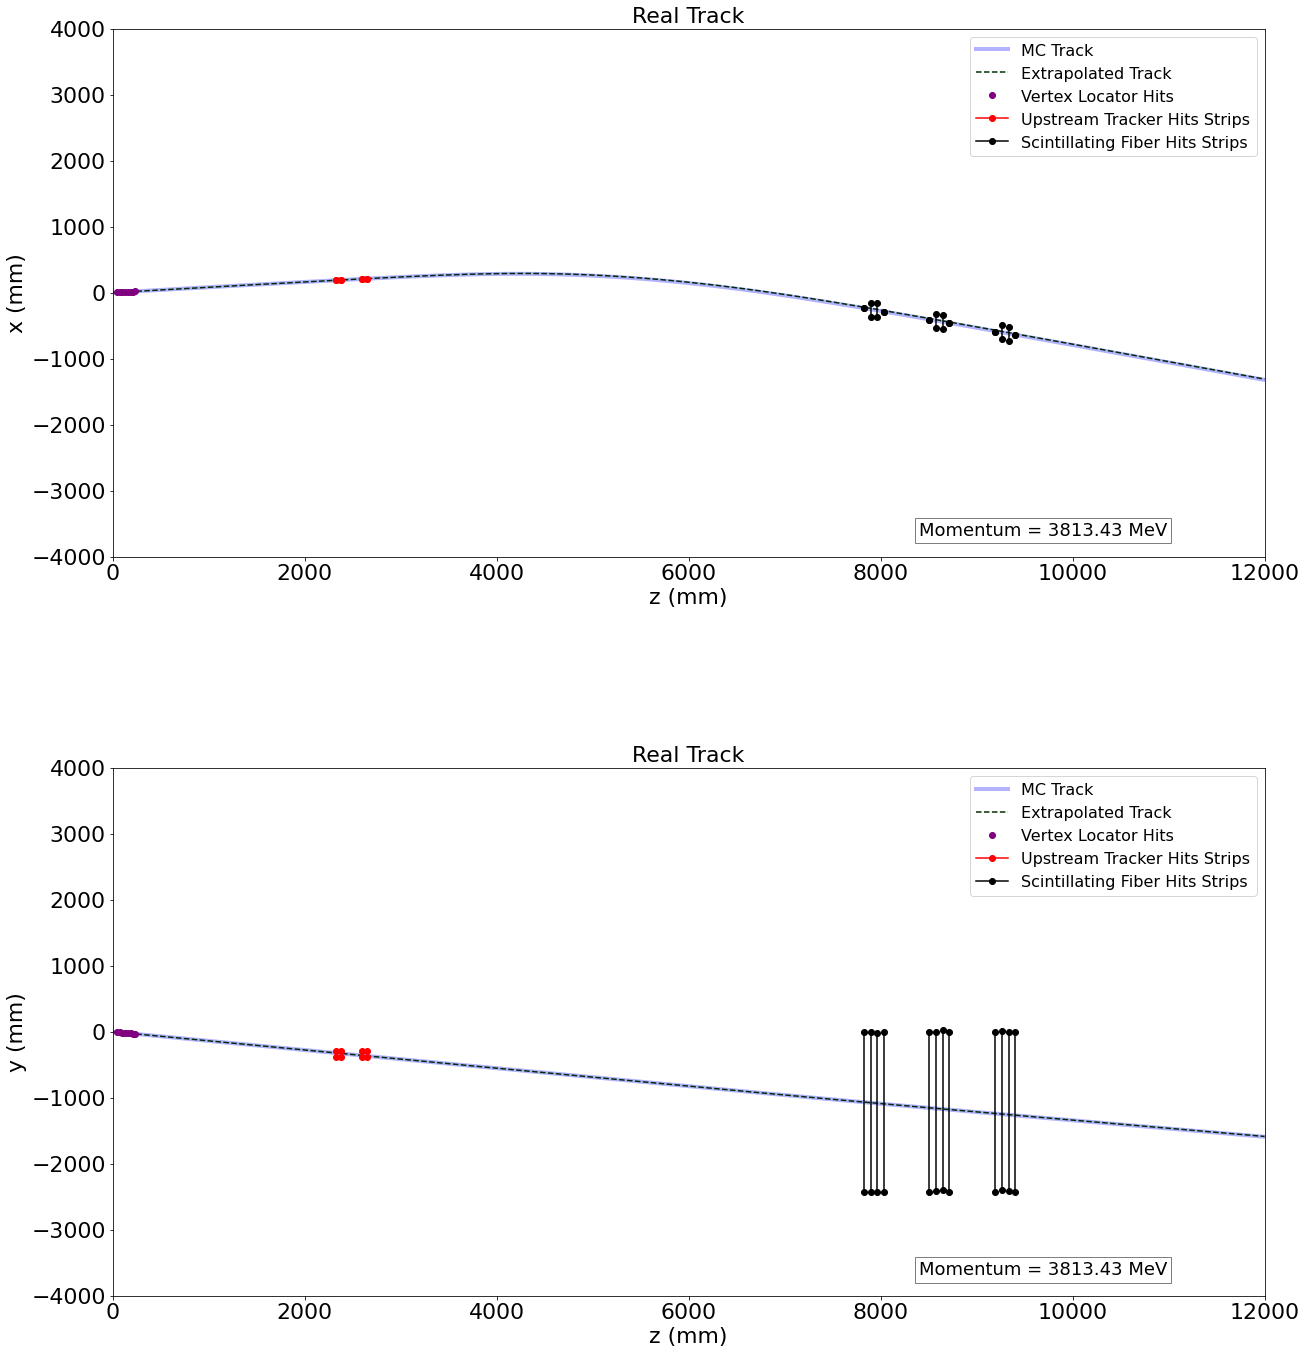

In [36]:
#plotting the track along with the VeLo, UT, SciFi hits, and the true trajectory from Monte Carlo
plot_tracks(z_traj1, x_traj1, y_traj1,xc, ut_z01, ut_xmin, ut_xmax, ut_ymin1, ut_ymax1, scifi_xmax, scifi_xmin, scifi_z01, scifi_ymin1,
             scifi_ymax1)
